## Student Performance Indicator
### Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model


**1) Problem statement**
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.  

**2) Data Collection**
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.
##### Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the CSV Data as Pandas DataFrame
df = pd.read_csv('data/stud.csv')

In [3]:
#Shape of the dataset
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

#### 2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score
#### Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column


In [5]:
#Check Missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

In [6]:
#Check Duplicates
df.duplicated().sum()

0

There are no duplicates values in the data set

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#Checking the number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
#Check statistics of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is  higher = 10 and for reading is the highest = 17

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Print the categories for each variable
print("Categories in 'gender' variable:", df['gender'].unique())
print("Categories in 'race_ethnicity' variable:", df['race_ethnicity'].unique())
print("Categories in 'parental level of education' variable:", df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:", df['lunch'].unique())
print("Categories in 'test preparation course' variable:", df['test_preparation_course'].unique())



Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [12]:
# Define numerical and categorical columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Print columns
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


##### Adding columns for "Total Score" and "Average"


In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df_sorted = df.sort_values('average', ascending=False)
df_sorted.head(20)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
712,female,group D,some college,standard,none,98,100,99,297,99.000000
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
625,male,group D,some college,standard,completed,100,97,99,296,98.666667
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.666667
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667


In [14]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df_sorted = df.sort_values('average', ascending=True)
df_sorted.head(20)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
980,female,group B,high school,free/reduced,none,8,24,23,55,18.333333
596,male,group B,high school,free/reduced,none,30,24,15,69,23.000000
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333
76,male,group E,some high school,standard,none,30,26,22,78,26.000000
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
601,female,group C,high school,standard,none,29,29,30,88,29.333333
787,female,group B,some college,standard,none,19,38,32,89,29.666667
338,female,group B,some high school,free/reduced,none,24,38,27,89,29.666667
211,male,group C,some college,free/reduced,none,35,28,27,90,30.000000


In [15]:
reading_full = df.loc[df['reading_score'] == 100, 'average'].count()
writing_full = df.loc[df['writing_score'] == 100, 'average'].count()
math_full = df.loc[df['math_score'] == 100, 'average'].count()

print('Number of students with full marks in Maths:', math_full)
print('Number of students with full marks in Writing:', writing_full)
print('Number of students with full marks in Reading:', reading_full)


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
math_full_rows = df[df['math_score'] == 100]
math_full_rows = math_full_rows.style
math_full_rows

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
451,female,group E,some college,standard,none,100,92,97,289,96.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
623,male,group A,some college,standard,completed,100,96,86,282,94.000000
625,male,group D,some college,standard,completed,100,97,99,296,98.666667
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000


In [17]:
writing_full_rows = df[df['writing_score'] == 100]
writing_full_rows = writing_full_rows.style
writing_full_rows

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
377,female,group D,master's degree,free/reduced,completed,85,95,100,280,93.333333
403,female,group D,high school,standard,completed,88,99,100,287,95.666667
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292,97.333333
685,female,group E,master's degree,standard,completed,94,99,100,293,97.666667
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.666667


In [18]:
reading_full_rows = df[df['reading_score'] == 100]
reading_full_rows_df = reading_full_rows.style
reading_full_rows_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
381,male,group C,associate's degree,standard,completed,87,100,95,282,94.000000
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
546,female,group A,some high school,standard,completed,92,100,97,289,96.333333
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292,97.333333
594,female,group C,bachelor's degree,standard,completed,92,100,99,291,97.000000


In [19]:
reading_less_20 = df.loc[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df.loc[df['writing_score'] <= 20]['average'].count()
math_less_20 = df.loc[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


In [20]:
writing_less_20_rows=df[df['writing_score']  <= 20]
writing_less_20_rows =writing_less_20_rows.style
writing_less_20_rows

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333
596,male,group B,high school,free/reduced,none,30,24,15,69,23.000000


In [21]:
math_less_20_rows=df[df['math_score']  <= 20]
math_less_20_rows = math_less_20_rows.style
math_less_20_rows

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
787,female,group B,some college,standard,none,19,38,32,89,29.666667
980,female,group B,high school,free/reduced,none,8,24,23,55,18.333333


In [22]:
reading_less_20_rows=df[df['reading_score']  <= 20]
reading_less_20_rows = reading_less_20_rows.style
reading_less_20_rows

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000


**Insights**
- the really poor performing students and from a humble background and their parents are not very well educated
- maths is the worst performed 
- the students that prepared for the test were at the top of the class as opposed to those who didnt prepare. in which case, they failed.

### Exploring Data ( Visualization )

visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

#### Histogram & KDE

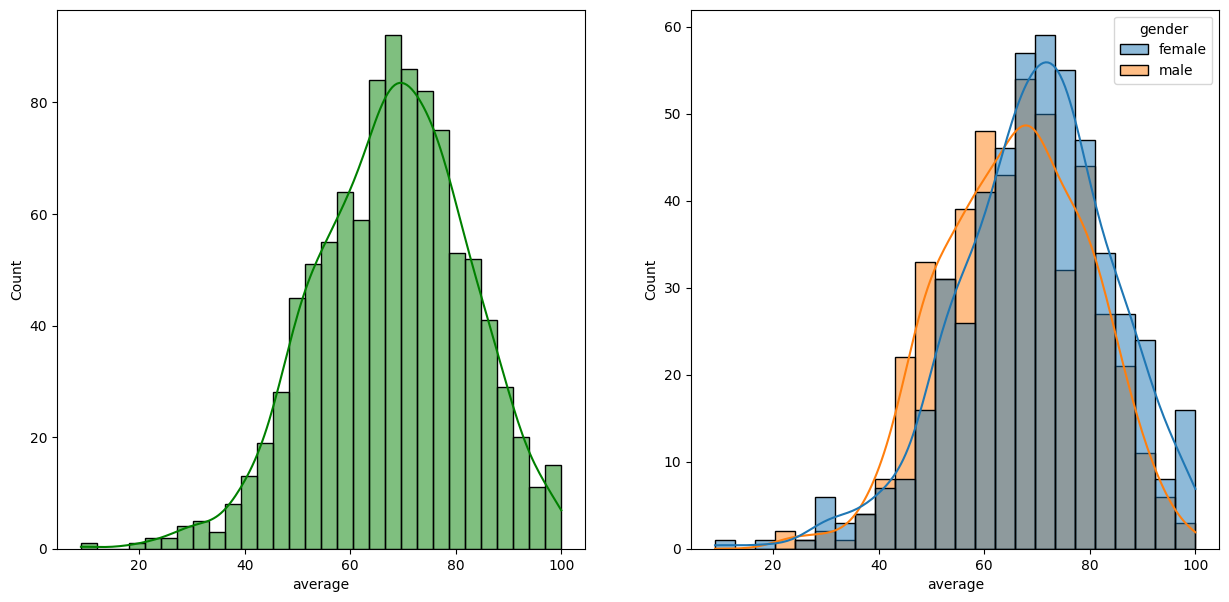

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

**Insights**  

Female students tend to perform well then male students.

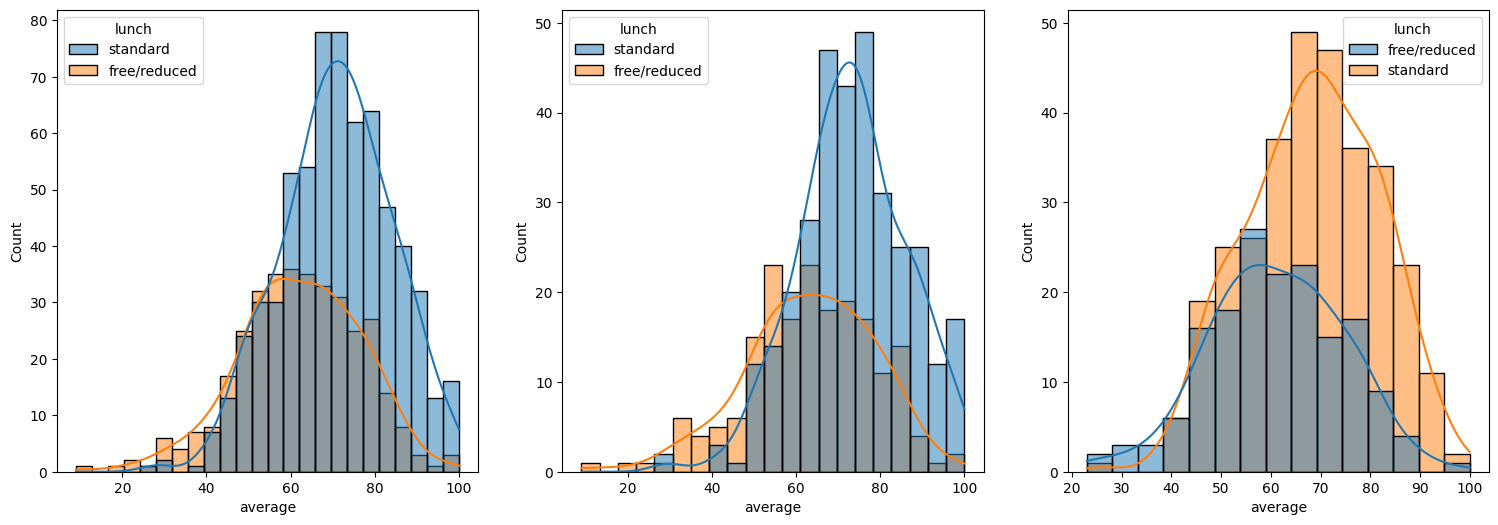

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

**Insights** 

- Kids who have standard lunch meaning their finanancial background is ok, generally perform better whether they are male or female.


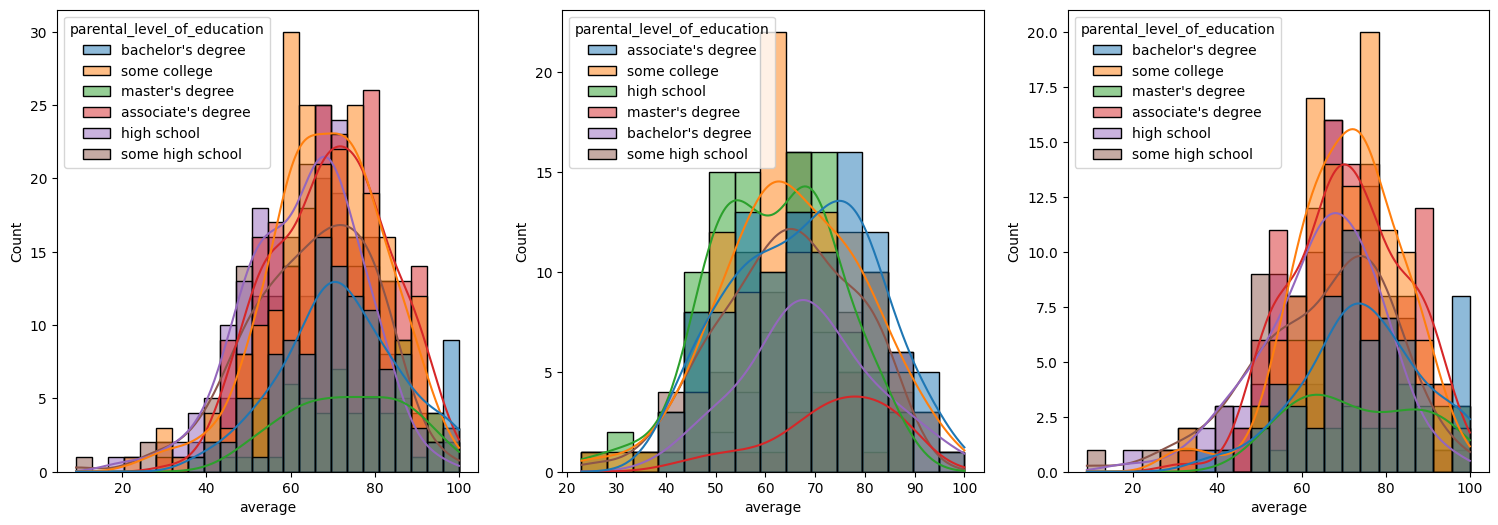

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

**Insights** 
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

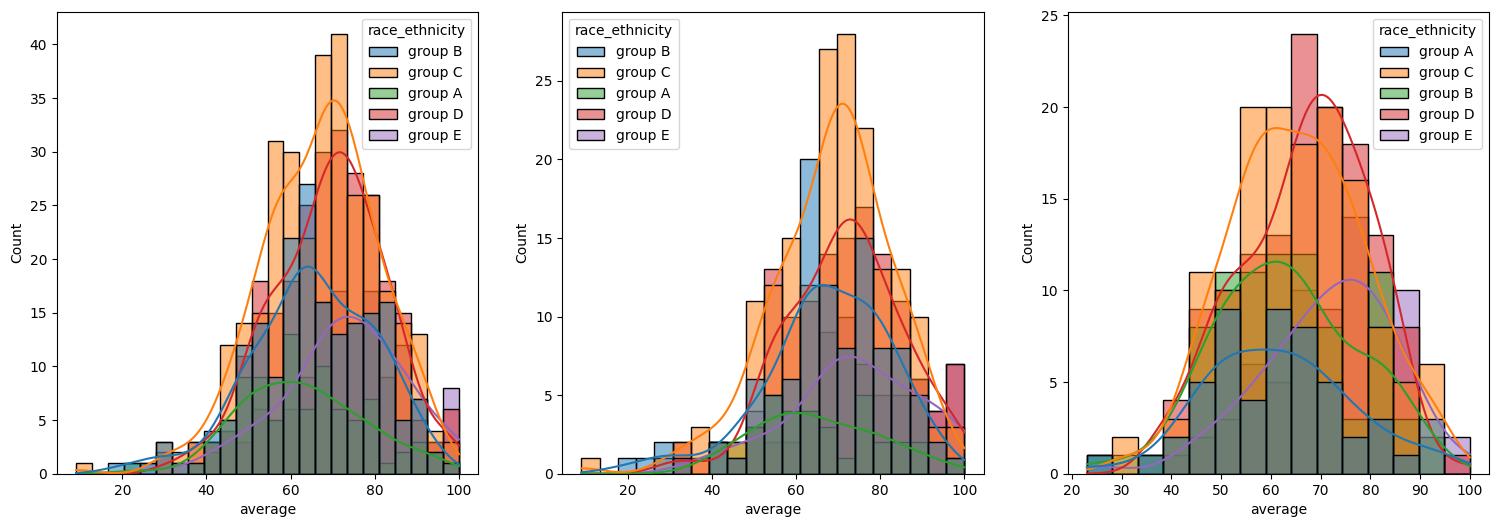

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

**Insights**  
Students of group A tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### Maximumum score of students in all three subjects

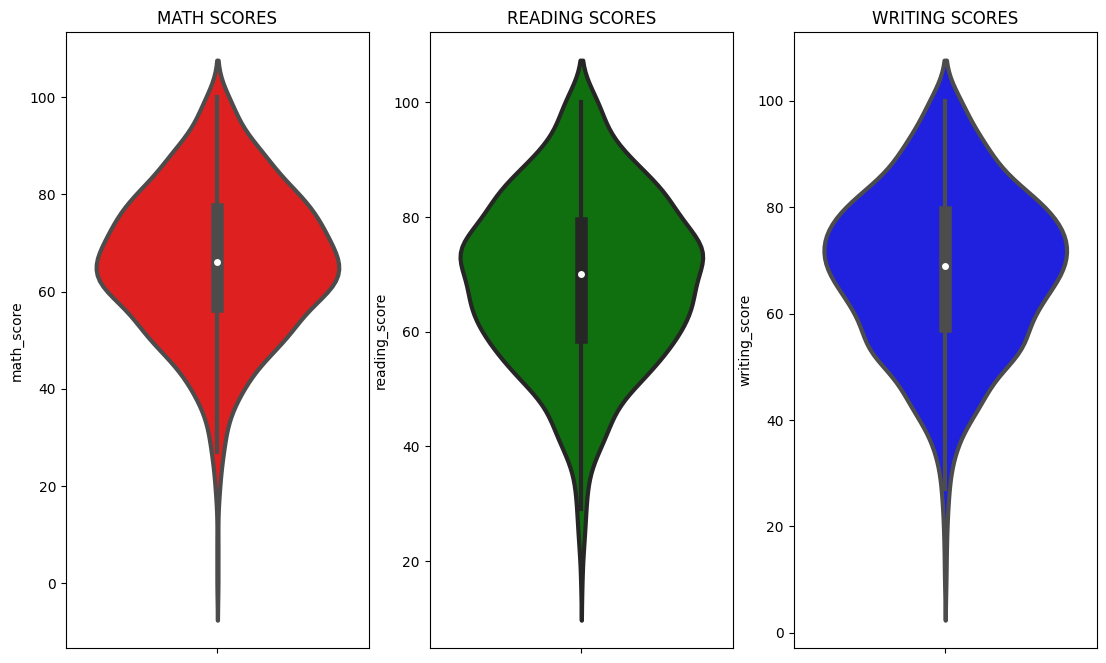

In [27]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

##### Multivariate analysis using pieplot

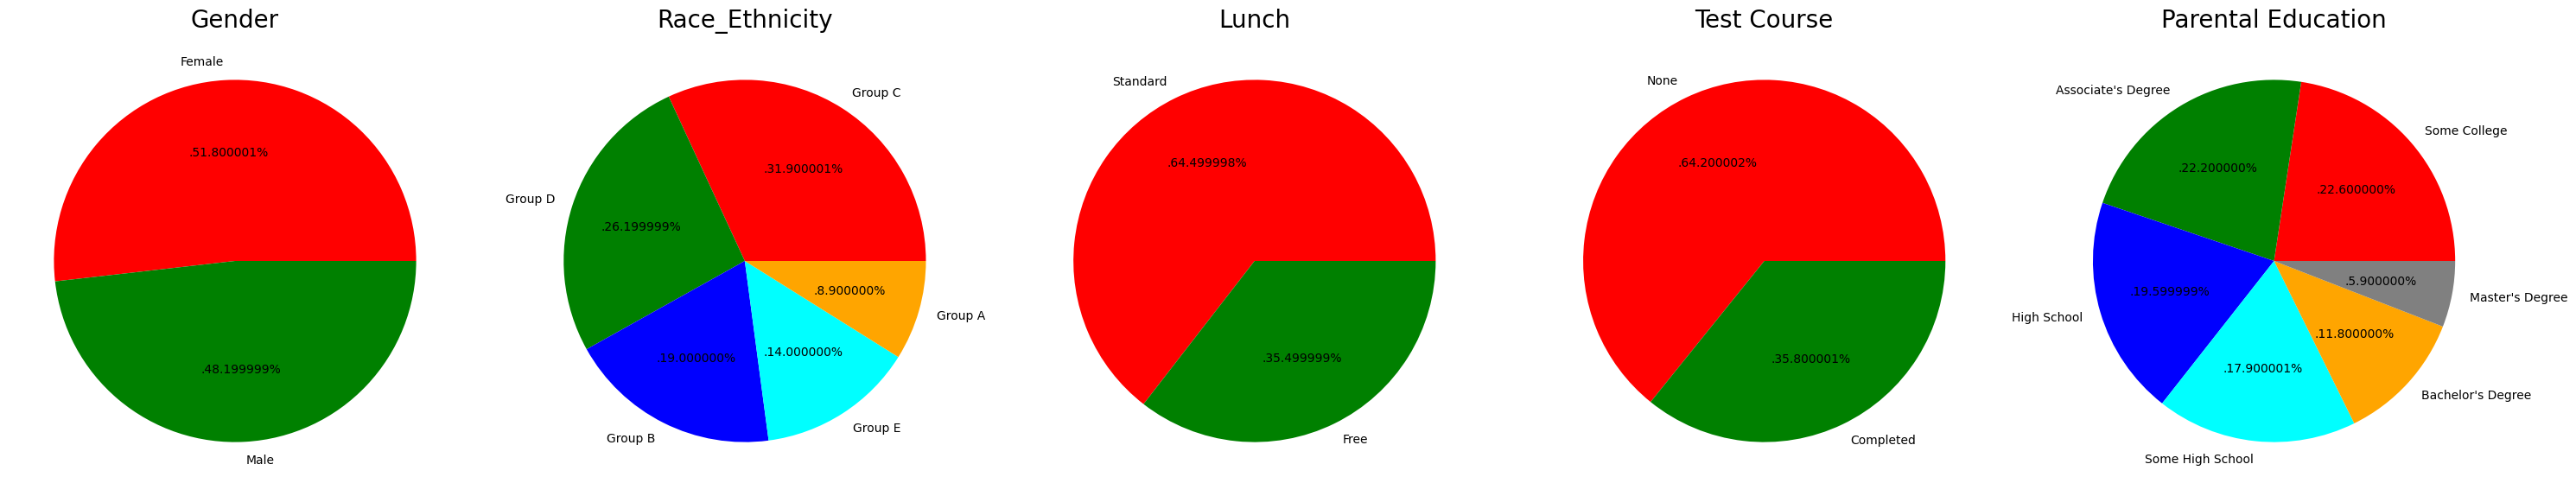

In [28]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

**Insights**
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose 
- parental education is "Some College" is greater followed closely by "Associate's Degree"


##### Feature Wise Visualization

 #### GENDER COLUMN

- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

##### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

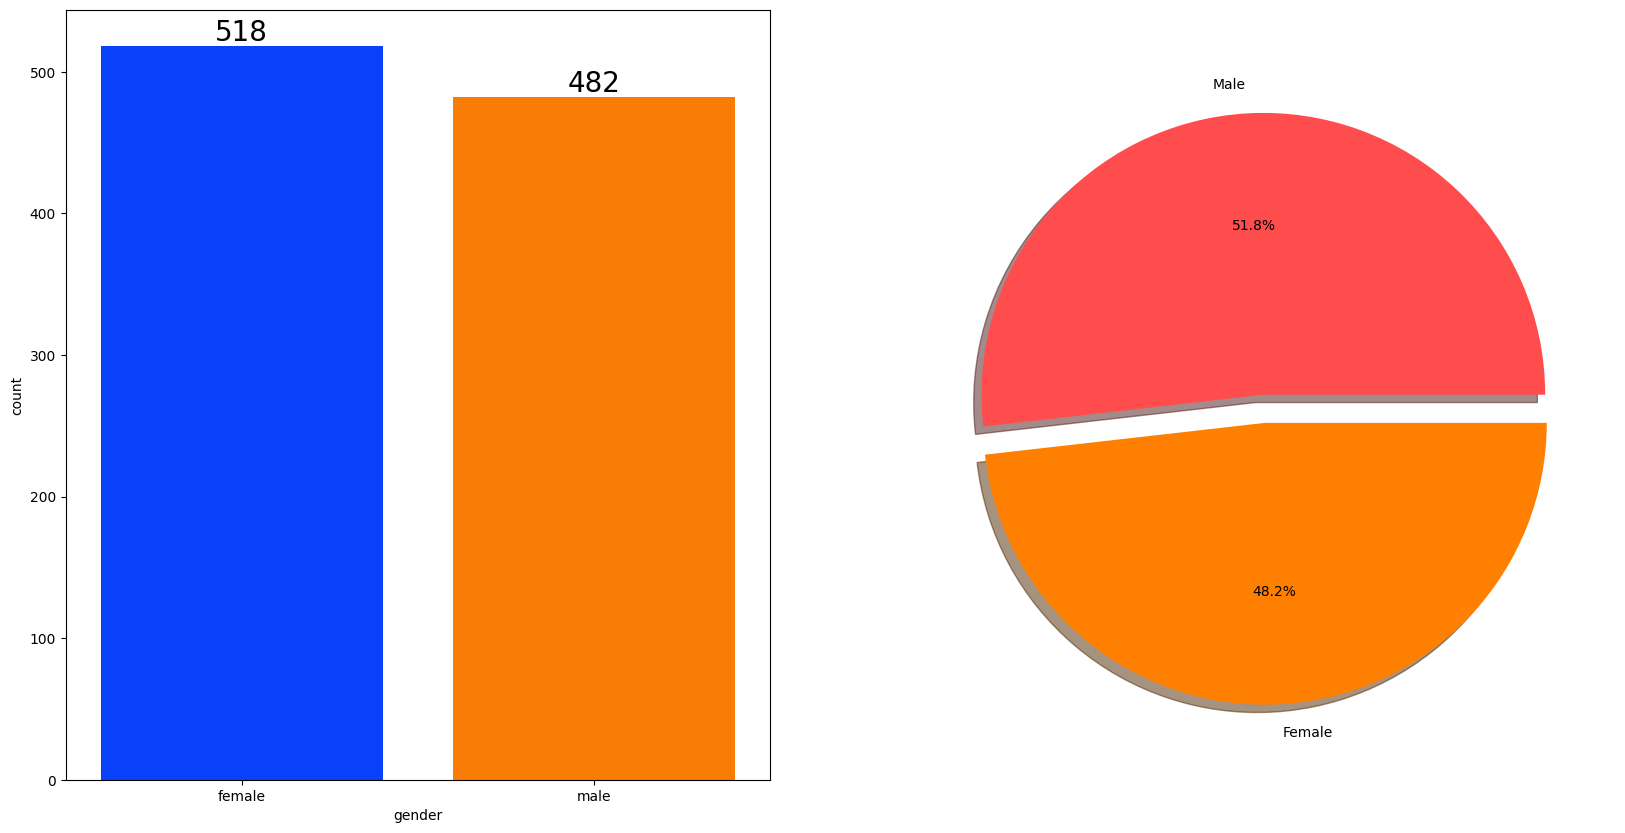

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

**Insights**
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### BIVARIATE ANALYSIS (Does gender have any impact on student's performance ? )

In [48]:
gender_group = df.groupby('gender').mean()
gender_group 

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


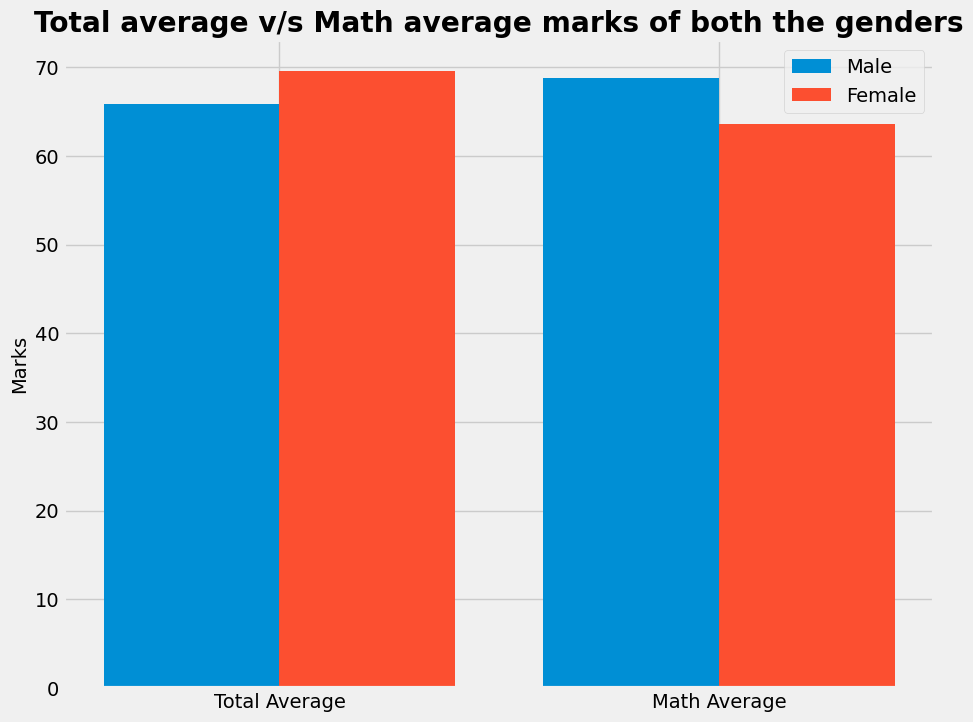

In [49]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**Insights**
- On an average females have a better score in reading, writing and the overall score.
- whereas males have scored higher in Maths compared to females.

#### RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?
#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

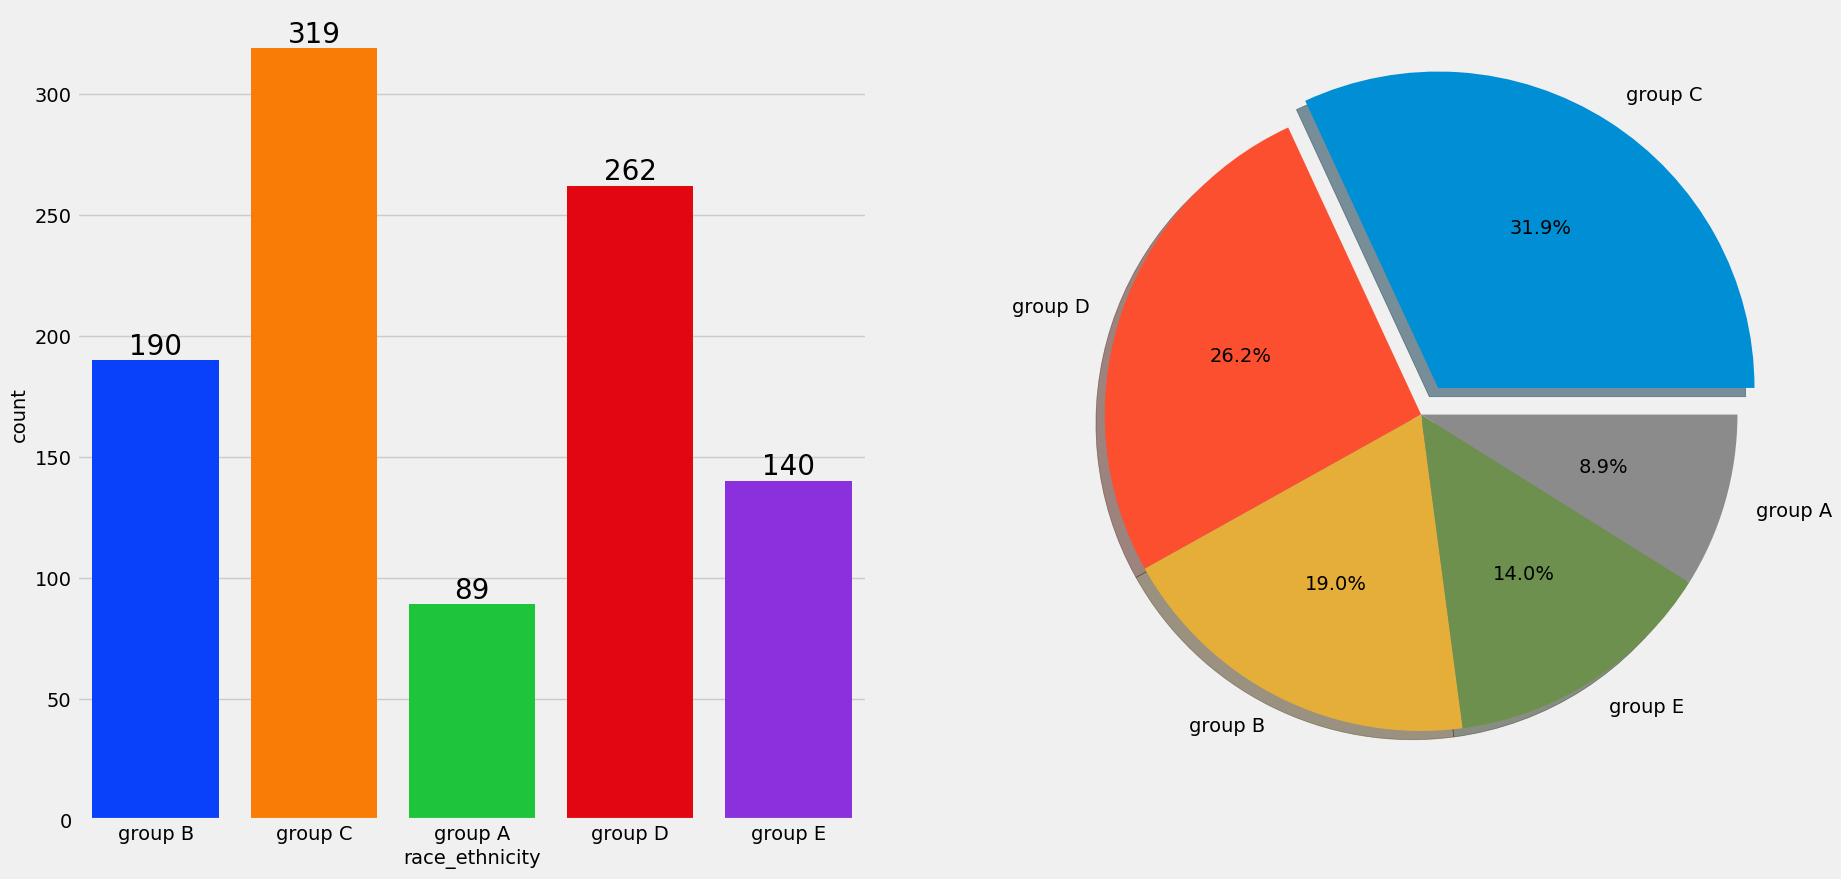

In [50]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

**Insights** 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Does Race/Ehnicity have any impact on student's performance ? )

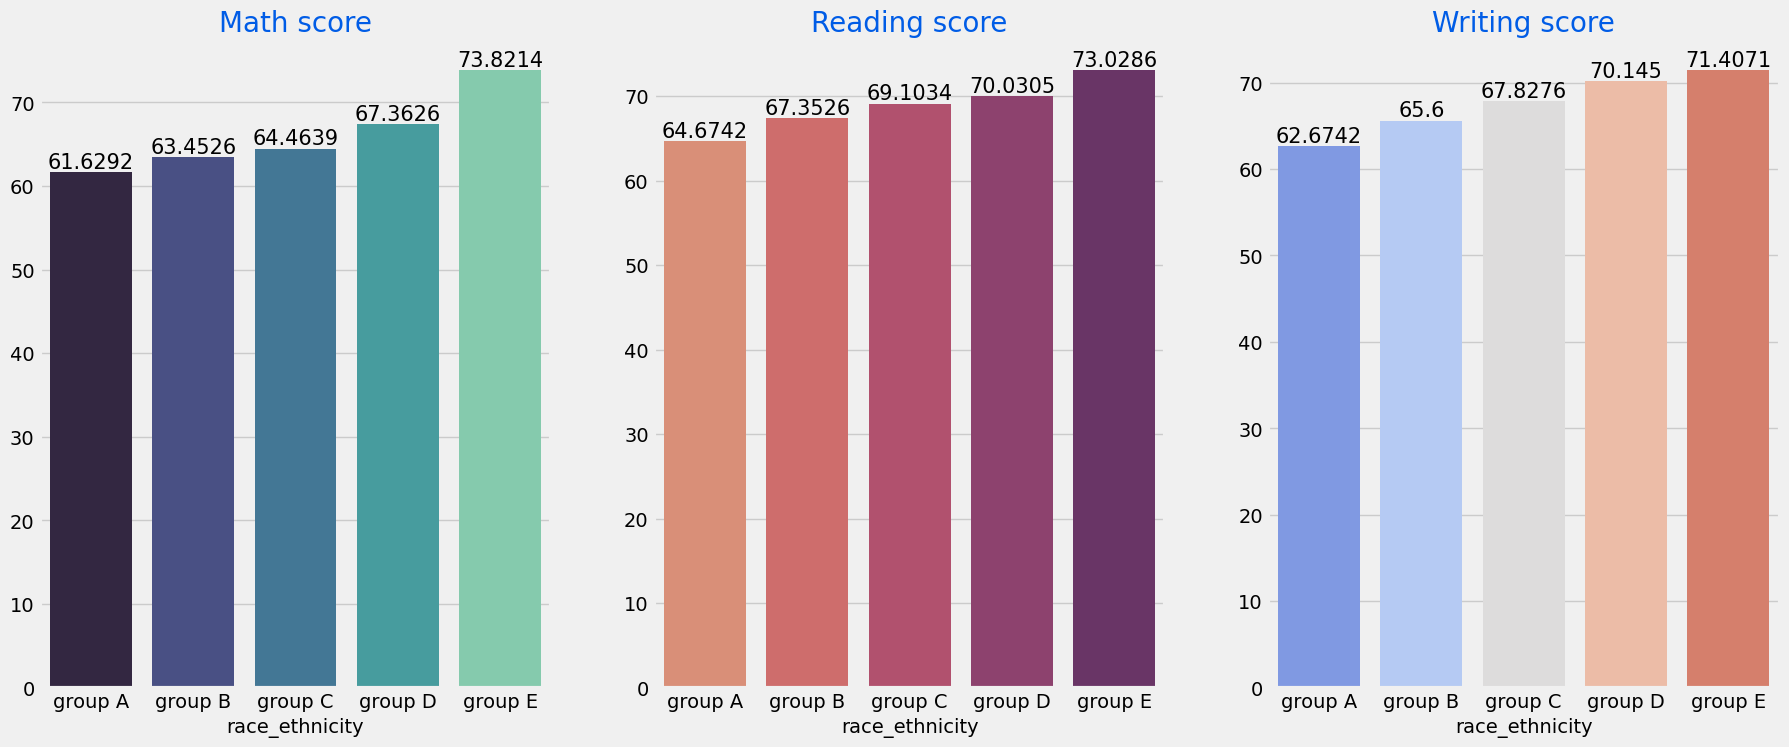

In [51]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights**

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.


#### PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?
#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

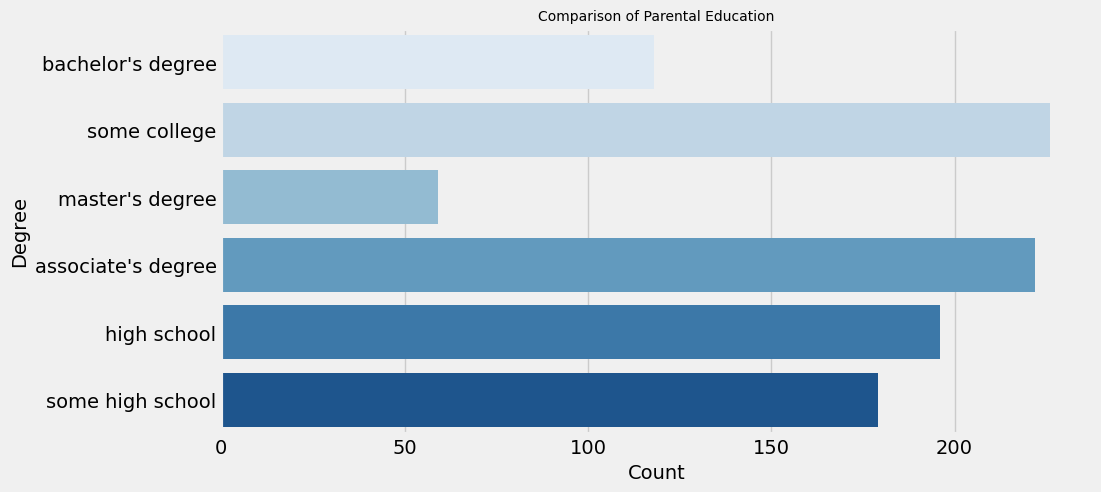

In [52]:

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

sns.countplot(y='parental_level_of_education', data=df, palette='Blues')
plt.title('Comparison of Parental Education', fontweight=10, fontsize=10)
plt.xlabel('Count')
plt.ylabel('Degree')
plt.show()

**Insights** 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

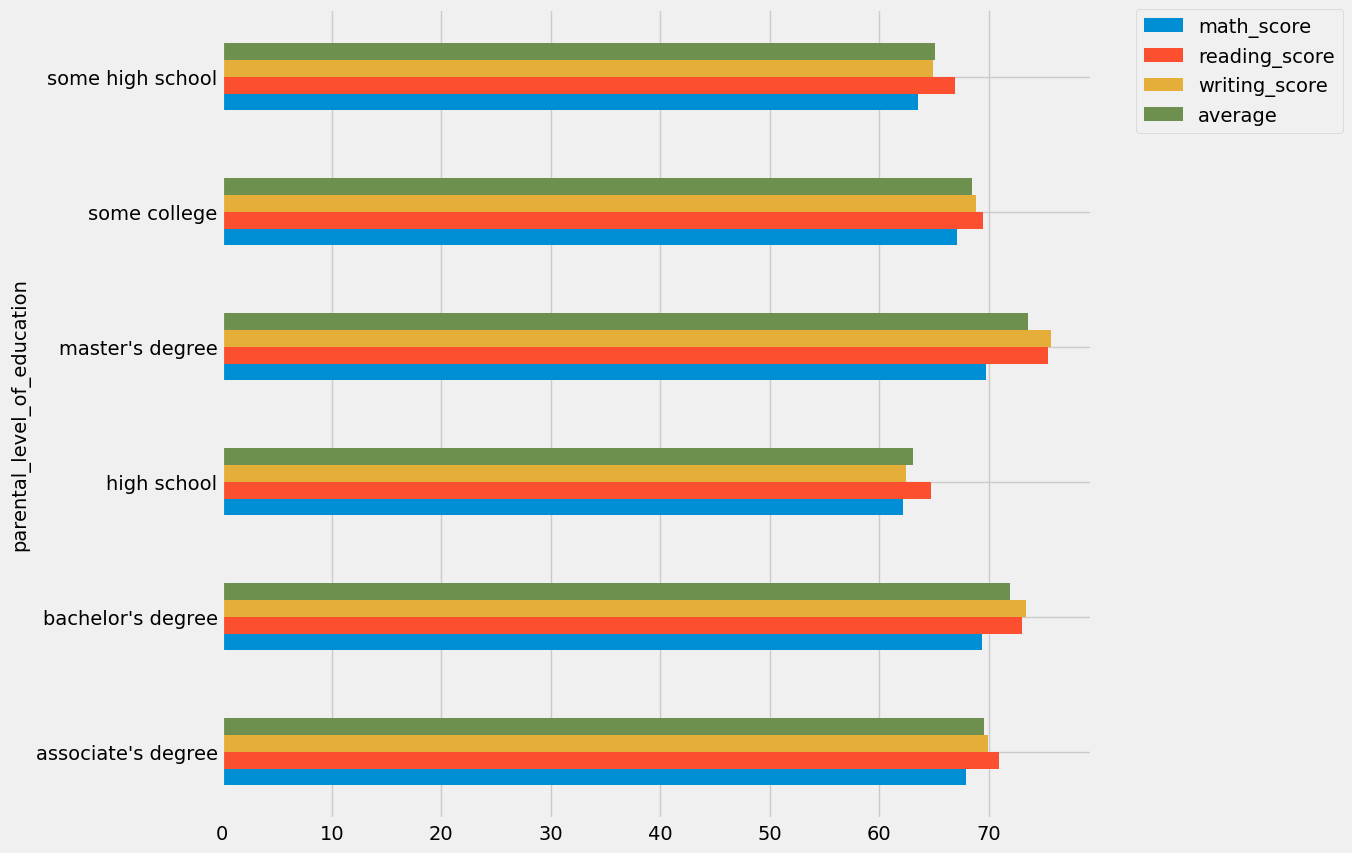

In [53]:
df.groupby('parental_level_of_education').mean().drop('total_score', axis=1).plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


**Insights** 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?
#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

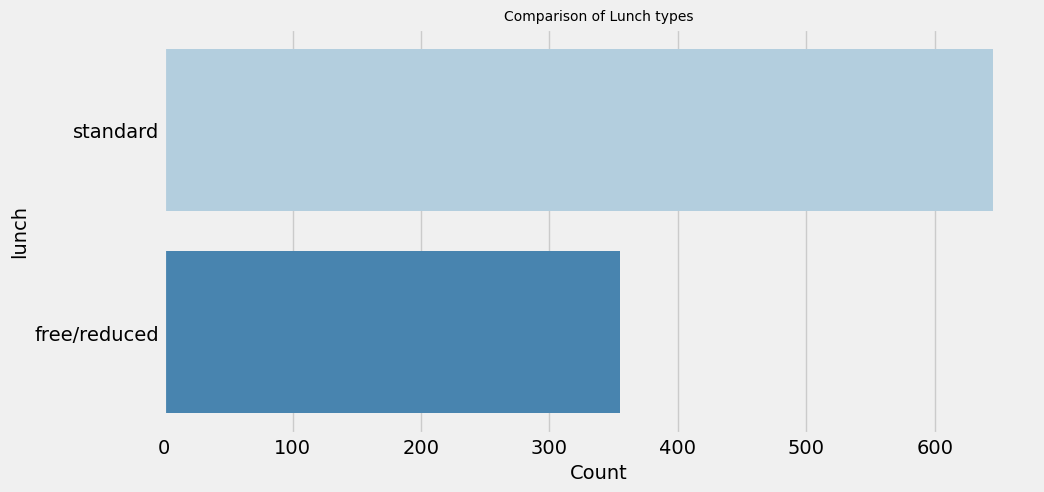

In [54]:


plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

sns.countplot(y='lunch', data=df, palette='Blues')
plt.title('Comparison of Lunch types', fontweight=10, fontsize=10)
plt.xlabel('Count')
plt.ylabel('lunch')
plt.show()

**Insights** 
- Students being served Standard lunch was more than free lunch
#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

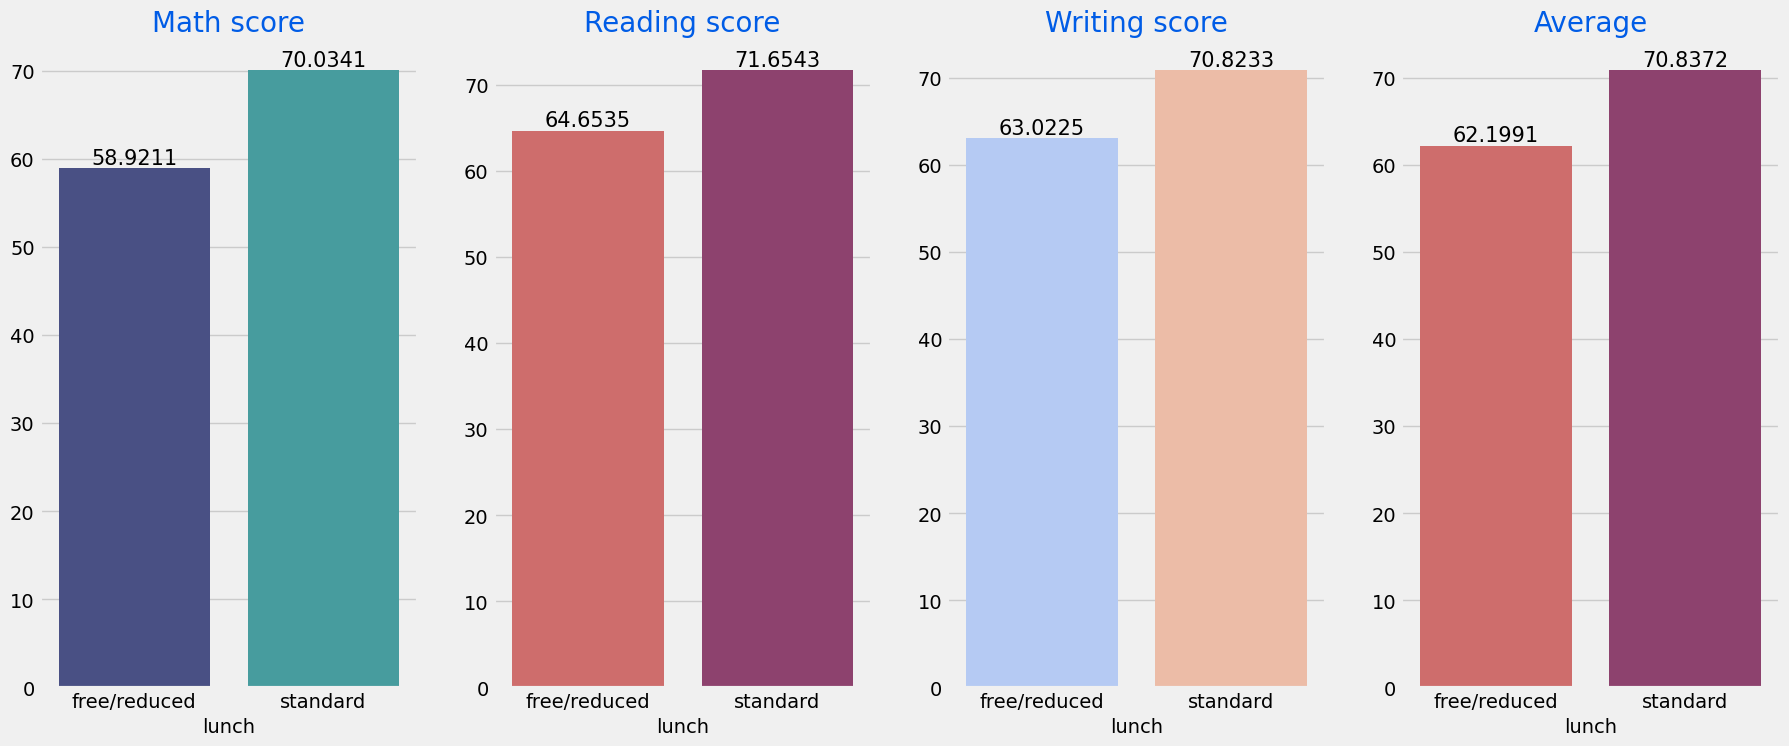

In [55]:
Group_data3=df.groupby('lunch')
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.barplot(x=Group_data3['math_score'].mean().index,y=Group_data3['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['reading_score'].mean().index,y=Group_data3['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['writing_score'].mean().index,y=Group_data3['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15) 
    
sns.barplot(x=Group_data3['average'].mean().index,y=Group_data3['average'].mean().values,palette = 'flare',ax=ax[3])
ax[3].set_title('Average',color='#005ce6',size=20)

for container in ax[3].containers:
    ax[3].bar_label(container,color='black',size=15)

**Insights**
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?
#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

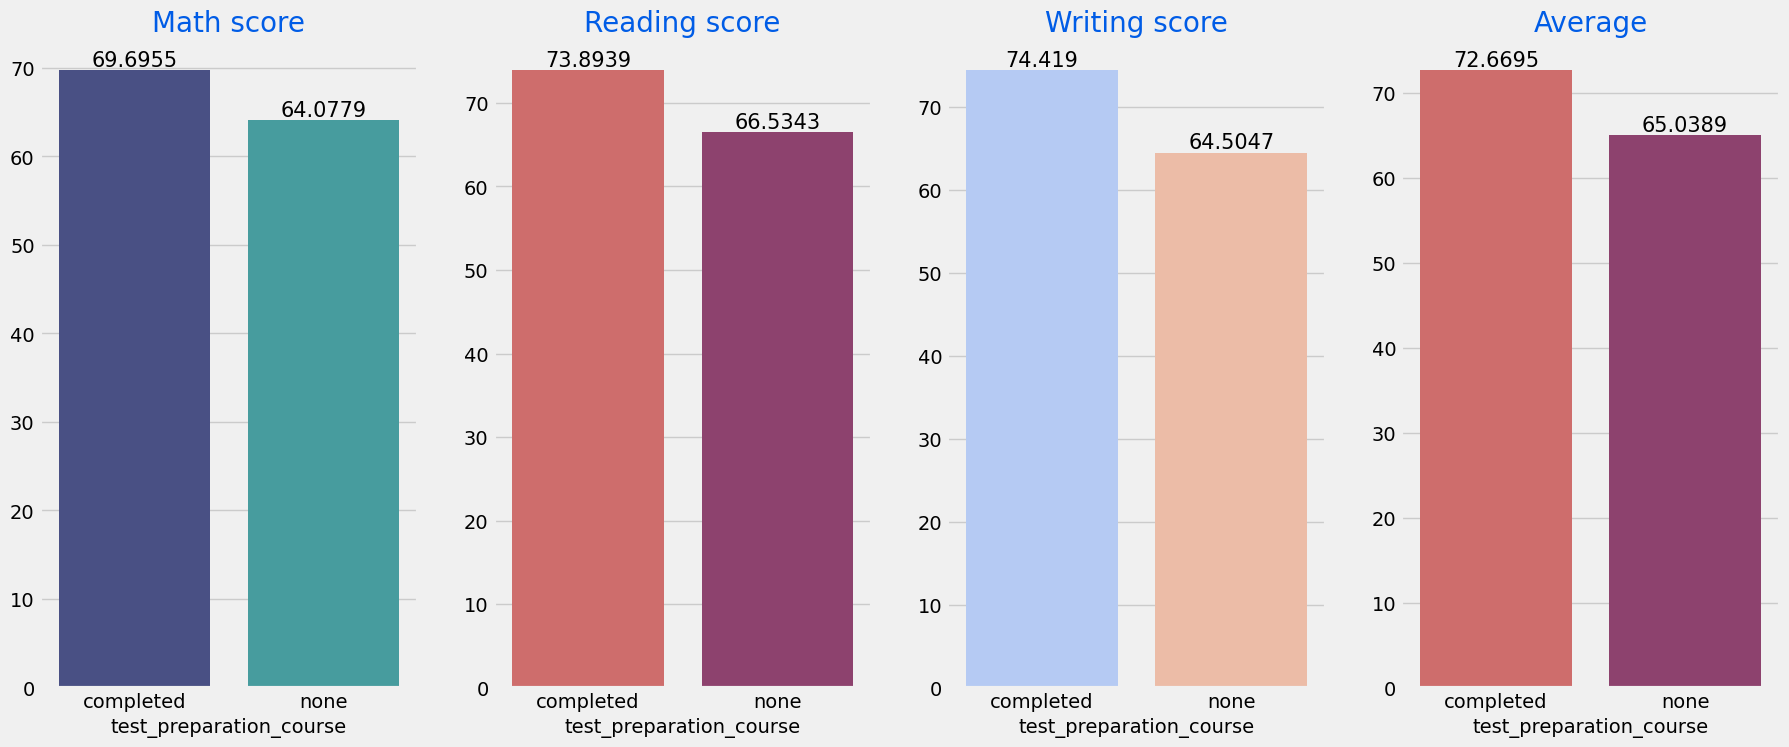

In [56]:
Group_data4=df.groupby('test_preparation_course')
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.barplot(x=Group_data4['math_score'].mean().index,y=Group_data4['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data4['reading_score'].mean().index,y=Group_data4['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data4['writing_score'].mean().index,y=Group_data4['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15) 
    
sns.barplot(x=Group_data4['average'].mean().index,y=Group_data4['average'].mean().values,palette = 'flare',ax=ax[3])
ax[3].set_title('Average',color='#005ce6',size=20)

for container in ax[3].containers:
    ax[3].bar_label(container,color='black',size=15)

**Insights**
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### CHECKING OUTLIERS

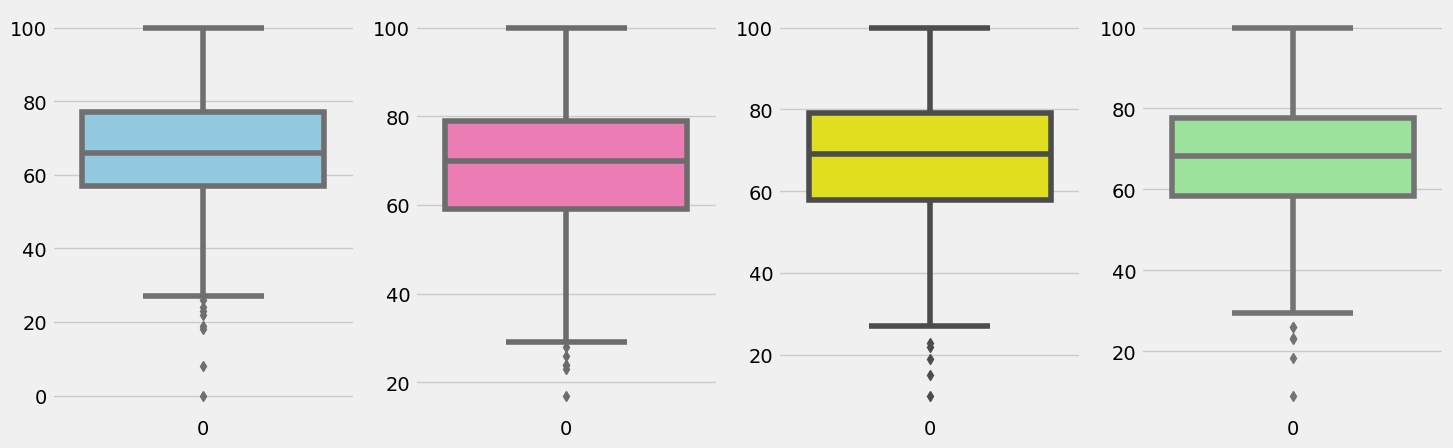

In [57]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

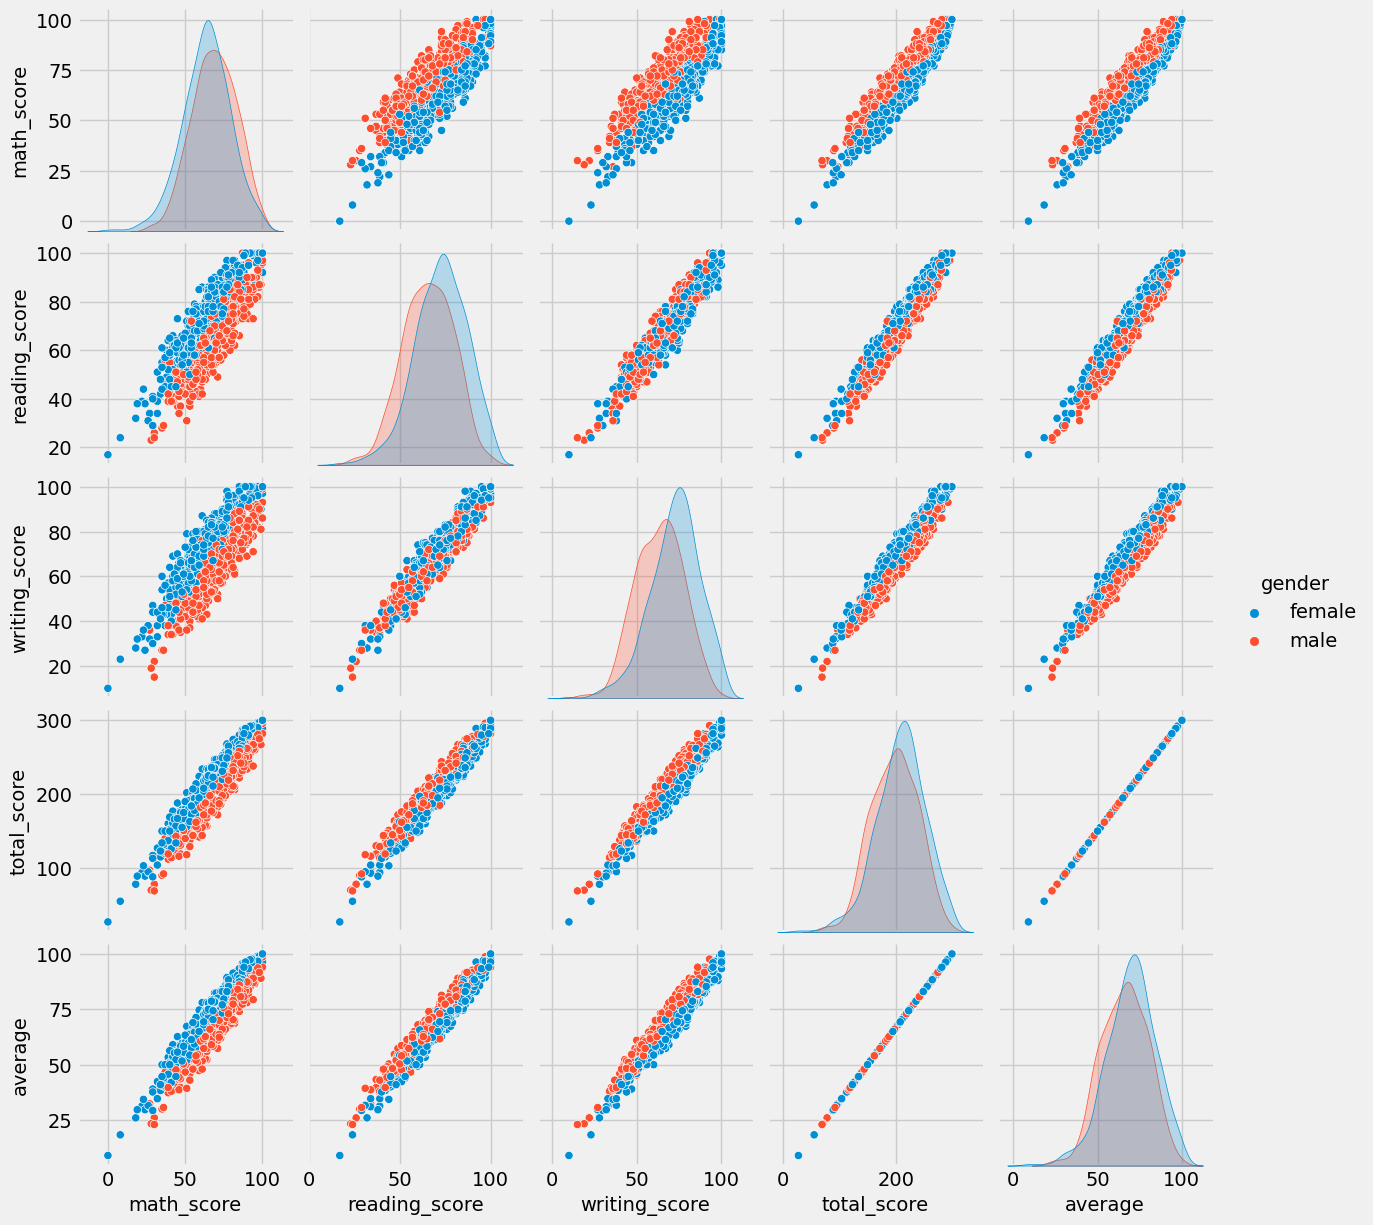

In [58]:
sns.pairplot(df,hue = 'gender')
plt.show()

**Insights**
- From the above plot it is clear that all the scores increase linearly with each other.
#### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.